In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18894 sha256=6d0e25af0012a2208c55430f86c146ce8e99dec051ad7cca4c75c425bc573a4d
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from keras.initializers import GlorotNormal
import tensorflow as tf
from keras.callbacks import History
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu

In [ ]:
# Load the dataset
alureon = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/alureon.csv')
banjori = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/banjori.csv')
bedep = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/bedep.csv')
ccleaner = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/ccleaner.csv')
chinad = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/chinad.csv')
corebot = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/corebot.csv')
cryptolocker = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/cryptolocker.csv')
dircrypt = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/dircrypt.csv')
dyre = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/dyre.csv')
fobber_v1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/fobber_v1.csv')
fobber_v2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/fobber_v2.csv')
gozi_gpl = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/gozi_gpl.csv')
gozi_luther = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/gozi_luther.csv')
gozi_nasa = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/gozi_nasa.csv')
gozi_rfc4343 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/gozi_rfc4343.csv')
kraken_v1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/kraken_v1.csv')
kraken_v2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/kraken_v2.csv')
locky = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/locky.csv')
matsnu = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/matsnu.csv')
murofet_v1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/murofet_v1.csv')
murofet_v2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/murofet_v2.csv')
murofet_v3 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/murofet_v3.csv')
necurs = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/necurs.csv')
nymaim = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/nymaim.csv')
padcrypt = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/padcrypt.csv')
pizd = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/pizd.csv')
proslikefan = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/proslikefan.csv')
pushdo = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/pushdo.csv')
pykspa = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/pykspa.csv')
pykspa_noise = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/pykspa_noise.csv')
qadars = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/qadars.csv')
qakbot = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/qakbot.csv')
ramdo = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/ramdo.csv')
ramnit = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/ramnit.csv')
ranbyus_v1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/ranbyus_v1.csv')
ranbyus_v2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/ranbyus_v2.csv')
rovnix = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/rovnix.csv')
shiotob = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/shiotob.csv')
simda = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/simda.csv')
sisron = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/sisron.csv')
suppobox_1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/suppobox_1.csv')
suppobox_2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/suppobox_2.csv')
suppobox_3 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/suppobox_3.csv')
symmi = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/symmi.csv')
tempedreve = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/tempedreve.csv')
tinba = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/tinba.csv')
vawtrak_v1 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/vawtrak_v1.csv')
vawtrak_v2 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/vawtrak_v2.csv')
vawtrak_v3 = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/vawtrak_v3.csv')
zeus_newgoz = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/zeus_newgoz.csv')
legit = pd.read_csv('/content/drive/MyDrive/dataset/dga/1000/legit.csv')
dataset = pd.concat([alureon, banjori, bedep, ccleaner, chinad, corebot, cryptolocker, dircrypt, dyre, fobber_v1,
                     fobber_v2, gozi_gpl, gozi_luther, gozi_rfc4343, kraken_v1, kraken_v2, locky, matsnu, murofet_v1,
                     murofet_v2, murofet_v3, necurs, nymaim, padcrypt, pizd, proslikefan, pushdo, pykspa, pykspa_noise,
                     qadars, ramdo, ramnit, ranbyus_v1, ranbyus_v2, rovnix, shiotob, simda, sisron, suppobox_1, suppobox_2,
                     suppobox_3, symmi, tempedreve, tinba, vawtrak_v1, vawtrak_v2, vawtrak_v3, zeus_newgoz, legit], ignore_index=True)

# 2. Normalize dữ liệu

In [ ]:
# Mã hóa nhãn lớp
label_encoder = LabelEncoder()
# Gán 0 cho nhãn 'legit' và 1 cho các lớp DGA khác
dataset['class'] = dataset['class'].apply(lambda x: 0 if x == 'legit' else 1)
encoded_class = dataset['class'].values

# Mã hóa tên miền
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['domain'])
encoded_domain = tokenizer.texts_to_sequences(dataset['domain'])

# Lấp đầy các chuỗi để đảm bảo độ dài đồng nhất
maxlen = max([len(seq) for seq in encoded_domain])
padded_domain = pad_sequences(encoded_domain, maxlen=maxlen)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(padded_domain, encoded_class, test_size=0.2, random_state=42)

# Xác định kích thước từ vựng
vocab_size = len(tokenizer.word_index) + 1  # Thêm 1 vì chỉ số 0 được dành riêng

# 3. Xây dựng và huấn luyện model

In [ ]:
# Định nghĩa kiến trúc mô hình với bộ khởi tạo GlorotNormal được gieo hạt
model = Sequential()

# Embedding: Tạo một lớp nhúng, chuyển đổi các số nguyên đại diện cho các từ thành các vector dày đặc.
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))

# Thêm lớp LSTM dưới dạng đối xứng
# Bidirectional LSTM: Một lớp LSTM đối xứng để mô hình học từ cả hai phía của chuỗi.
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

# Thêm tự chú ý dãn dấu trình tự
# SeqSelfAttention: Lớp tự chú ý dãn dấu trình tự để mô hình tập trung vào các phần quan trọng của dữ liệu đầu vào.
model.add(SeqSelfAttention(attention_activation='sigmoid'))

# Áp dụng dropout để tránh overfitting
# Dropout: Lớp dropout để tránh overfitting bằng cách loại bỏ một phần của các nơ-ron trong quá trình huấn luyện.
model.add(Dropout(0.5))

# Thêm lớp LSTM đối xứng khác
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

# Thêm chú ý trọng số trình tự
model.add(SeqWeightedAttention())

# Áp dụng dropout để tránh overfitting
model.add(Dropout(0.5))

# Thêm lớp kích hoạt ReLU
model.add(Dense(units=64, activation='relu'))

# Thêm lớp kích hoạt sigmoid cho việc phân loại nhị phân
model.add(Dense(units=1, activation='sigmoid'))

# Biên dịch mô hình với các tham số chính xác
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
# Tóm tắt mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 64)            2496      
                                                                 
 bidirectional (Bidirection  (None, 47, 128)           66048     
 al)                                                             
                                                                 
 seq_self_attention (SeqSel  (None, 47, 128)           8257      
 fAttention)                                                     
                                                                 
 dropout (Dropout)           (None, 47, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 47, 128)           98816     
 onal)                                                           
                                                        

In [ ]:
# Tạo callback History và EarlyStopping
history = History()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1223/1223 [==============================] - 39s 26ms/step - loss: 0.1128 - accuracy: 0.9799 - val_loss: 0.0567 - val_accuracy: 0.9806
Epoch 2/10
1223/1223 [==============================] - 21s 17ms/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 0.0532 - val_accuracy: 0.9828
Epoch 3/10
1223/1223 [==============================] - 23s 19ms/step - loss: 0.0516 - accuracy: 0.9836 - val_loss: 0.0536 - val_accuracy: 0.9815
Epoch 4/10
1223/1223 [==============================] - 21s 17ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 5/10
1223/1223 [==============================] - 22s 18ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0511 - val_accuracy: 0.9836
Epoch 6/10
1223/1223 [==============================] - 22s 18ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 7/10
1223/1223 [==============================] - 22s 18ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0506 -

In [ ]:

# Dự đoán trên tập kiểm tra
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Tính toán Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

306/306 [==============================] - 3s 6ms/step
Accuracy: 0.9845634839501125
Precision: 0.9863748967795211
Recall: 0.9980156657963446
F1-score: 0.9921611379328245


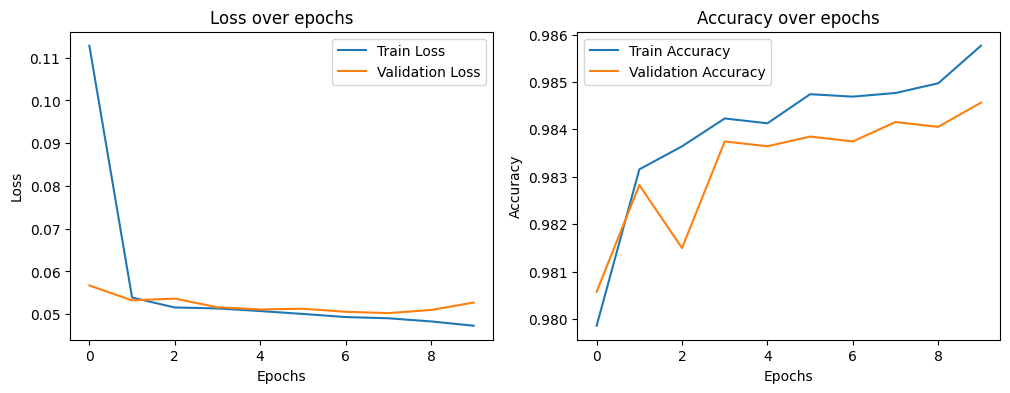

In [ ]:
# Vẽ biểu đồ lịch sử huấn luyện
plt.figure(figsize=(12, 4))

# Biểu đồ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

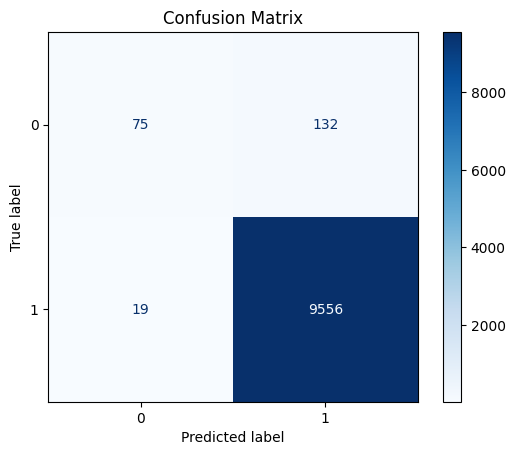

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# So sánh với các phương pháp phân loại nhị phân khác

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
def evaluate_AB(X_train, X_test, y_train, y_test):
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, recall, precision, f1

In [ ]:
def evaluate_NN(X_train, X_test, y_train, y_test):
    clf = MLPClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, recall, precision, f1

In [ ]:
def evaluate_RF(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, recall, precision, f1

In [ ]:
def evaluate_SVM(X_train, X_test, y_train, y_test,
                 C=1.0, kernel='linear', degree=2, gamma='auto', coef0=1.0, shrinking=False,
                 probability=False, tol=1, cache_size=100, class_weight='balanced', verbose=True,
                 max_iter=100, decision_function_shape='ovo', break_ties=False, random_state=42):

    clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, shrinking=shrinking,
              probability=probability, tol=tol, cache_size=cache_size, class_weight=class_weight,
              verbose=verbose, max_iter=max_iter, decision_function_shape=decision_function_shape,
              break_ties=break_ties, random_state=random_state)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return acc, recall, precision, f1

In [ ]:
def evaluate_DT(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, recall, precision, f1

In [ ]:
def evaluate_KNN(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, recall, precision, f1

In [ ]:
acc_AB, recall_AB, precision_AB, f1_AB = evaluate_AB(X_train, X_test, y_train, y_test)

In [ ]:
acc_NN, recall_NN, precision_NN, f1_NN = evaluate_NN(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
acc_RF, recall_RF, precision_RF, f1_RF = evaluate_RF(X_train, X_test, y_train, y_test)

In [ ]:
acc_SVM, recall_SVM, precision_SVM, f1_SVM = evaluate_SVM(X_train, X_test, y_train, y_test)

[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
acc_DT, recall_DT, precision_DT, f1_DT = evaluate_DT(X_train, X_test, y_train, y_test)

In [ ]:
acc_KNN, recall_KNN, precision_KNN, f1_KNN = evaluate_KNN(X_train, X_test, y_train, y_test)

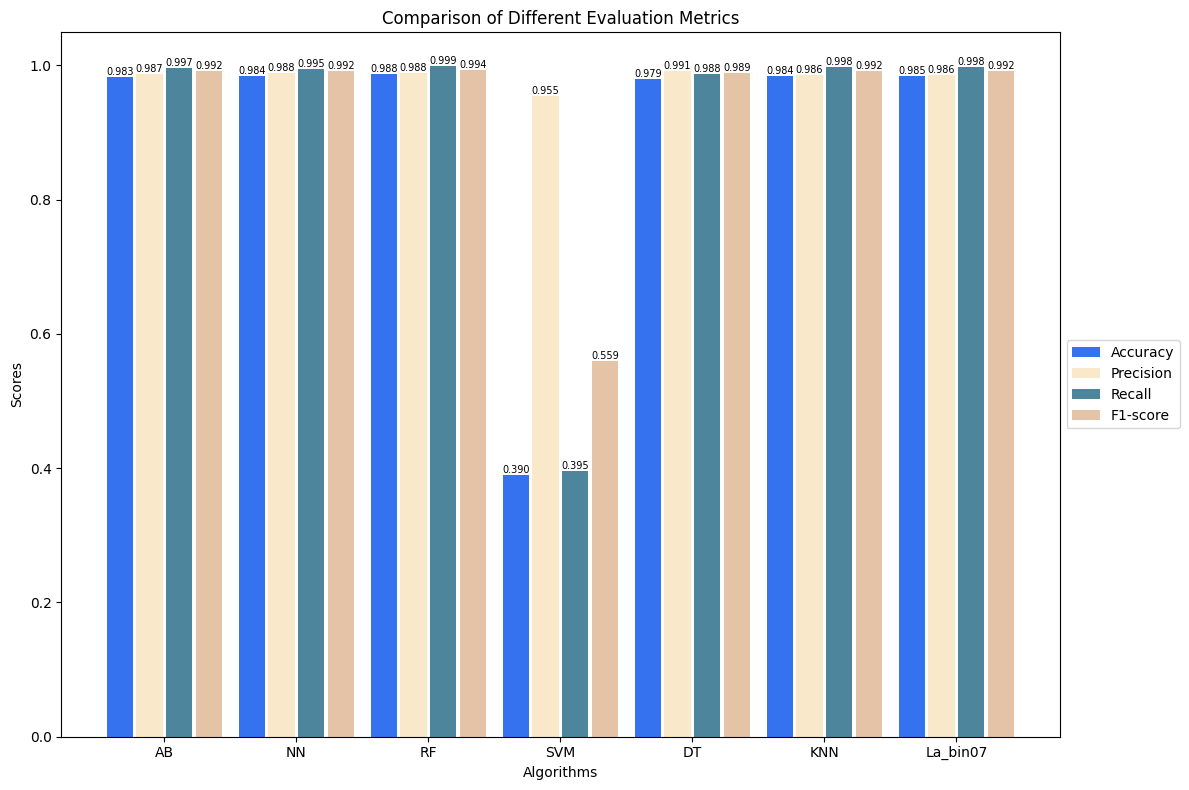

In [ ]:
# Chỉ số của các thuật toán
accuracies = [acc_AB, acc_NN, acc_RF, acc_SVM, acc_DT, acc_KNN, accuracy]
precisions = [precision_AB, precision_NN, precision_RF, precision_SVM, precision_DT, precision_KNN, precision]
f1_scores = [f1_AB, f1_NN, f1_RF, f1_SVM, f1_DT, f1_KNN, f1]
recalls = [recall_AB, recall_NN, recall_RF, recall_SVM, recall_DT, recall_KNN, recall]

# Tên của các thuật toán
labels = ['AB', 'NN', 'RF', 'SVM', 'DT', 'KNN', 'La_bin07']
colors = ['#3572EF', '#F9E8C9', '#4D869C', '#E5C3A6']

# Vẽ biểu đồ cột
x = np.arange(len(labels))
width = 0.2  # Độ rộng của các cột
space = 0.1

plt.figure(figsize=(12, 8))

bars1 = plt.bar(x - 1.5 * (width + space/4), accuracies, width, label='Accuracy', color=colors[0])
bars2 = plt.bar(x - 0.5 * (width + space/4), precisions, width, label='Precision', color=colors[1])
bars3 = plt.bar(x + 0.5 * (width + space/4), recalls, width, label='Recall', color=colors[2])
bars4 = plt.bar(x + 1.5 * (width + space/4), f1_scores, width, label='F1-score', color=colors[3])

# Thêm số ở đầu mỗi cột với 3 chữ số thập phân không làm tròn
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=7)

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Different Evaluation Metrics')
plt.xticks(x, labels)

# Đặt legend ở ngoài plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Tự động điều chỉnh các yếu tố để phù hợp với vùng vẽ
plt.show()